# Cervical Cancer Project

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [3]:
df = pd.read_csv('files/kag_risk_factors_cervical_cancer.csv')
df.info() # 858 patients, 35 features and a target variable (Biopsy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

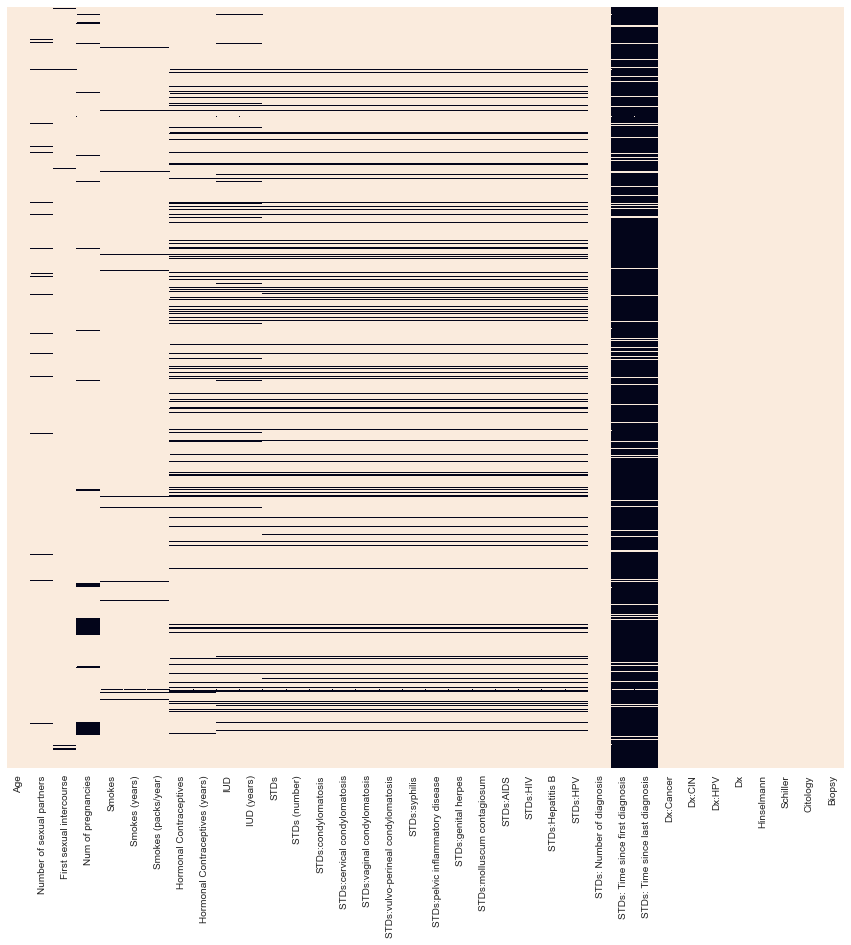

In [6]:
# missing data (as '?', drop time since STD diagnosis columns, impute others) 
plt.figure(figsize=(15,14))
sns.heatmap(df[df == '?'].isnull(),yticklabels=False,cbar=False)

## Data Preprocessing

### Drop columns with excessive missing values

In [7]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

### Impute median into columns with some missing values

In [8]:
clean_df = pd.DataFrame()

for col in df[['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'STDs','STDs (number)','IUD (years)','Smokes (years)','Smokes (packs/year)','STDs: Number of diagnosis','Hormonal Contraceptives (years)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV','STDs:AIDS','STDs:cervical condylomatosis',
       'STDs:Hepatitis B', 'STDs:HPV']]:
        indices = df[col][df[col] == '?'].index 
        for value in indices:
            df[col].loc[value] = df[col].drop(index=indices).median()

<AxesSubplot:>

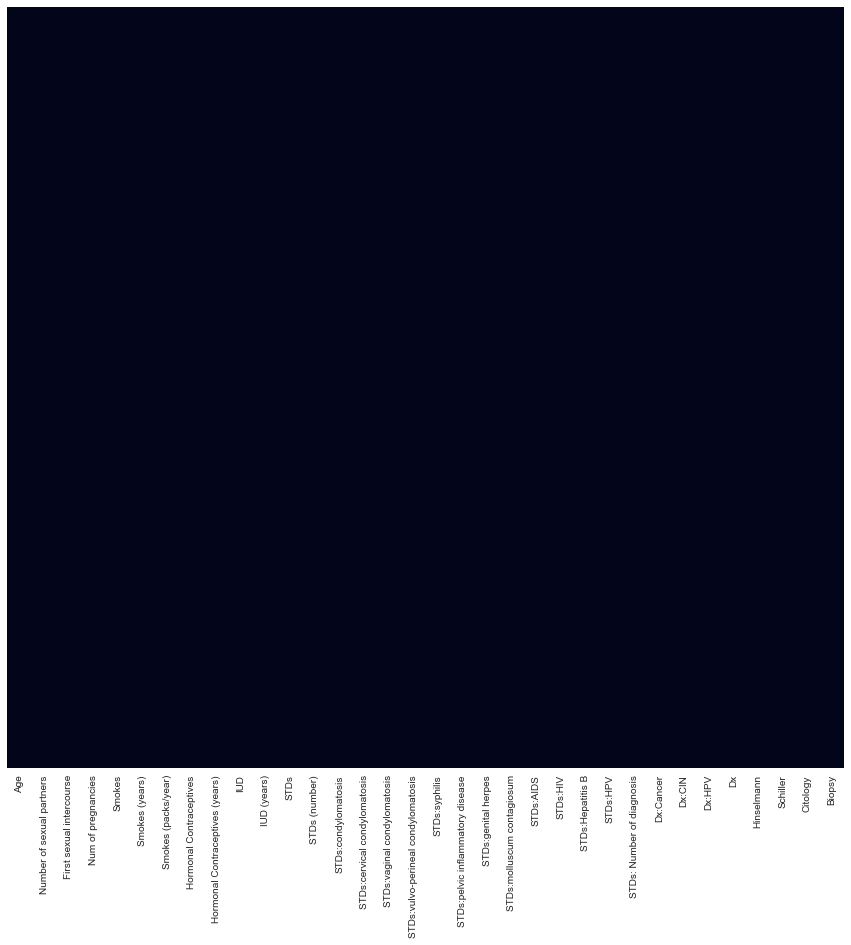

In [9]:
#  no more missing data
plt.figure(figsize=(15,14))
sns.heatmap(df[df == '?'].isnull(),yticklabels=False,cbar=False)

### Convert all columns to numeric

In [10]:
df = df.astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

### Create dummy variables for categorical features

In [12]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'], drop_first=True)

### Drop columns with only one value

<AxesSubplot:>

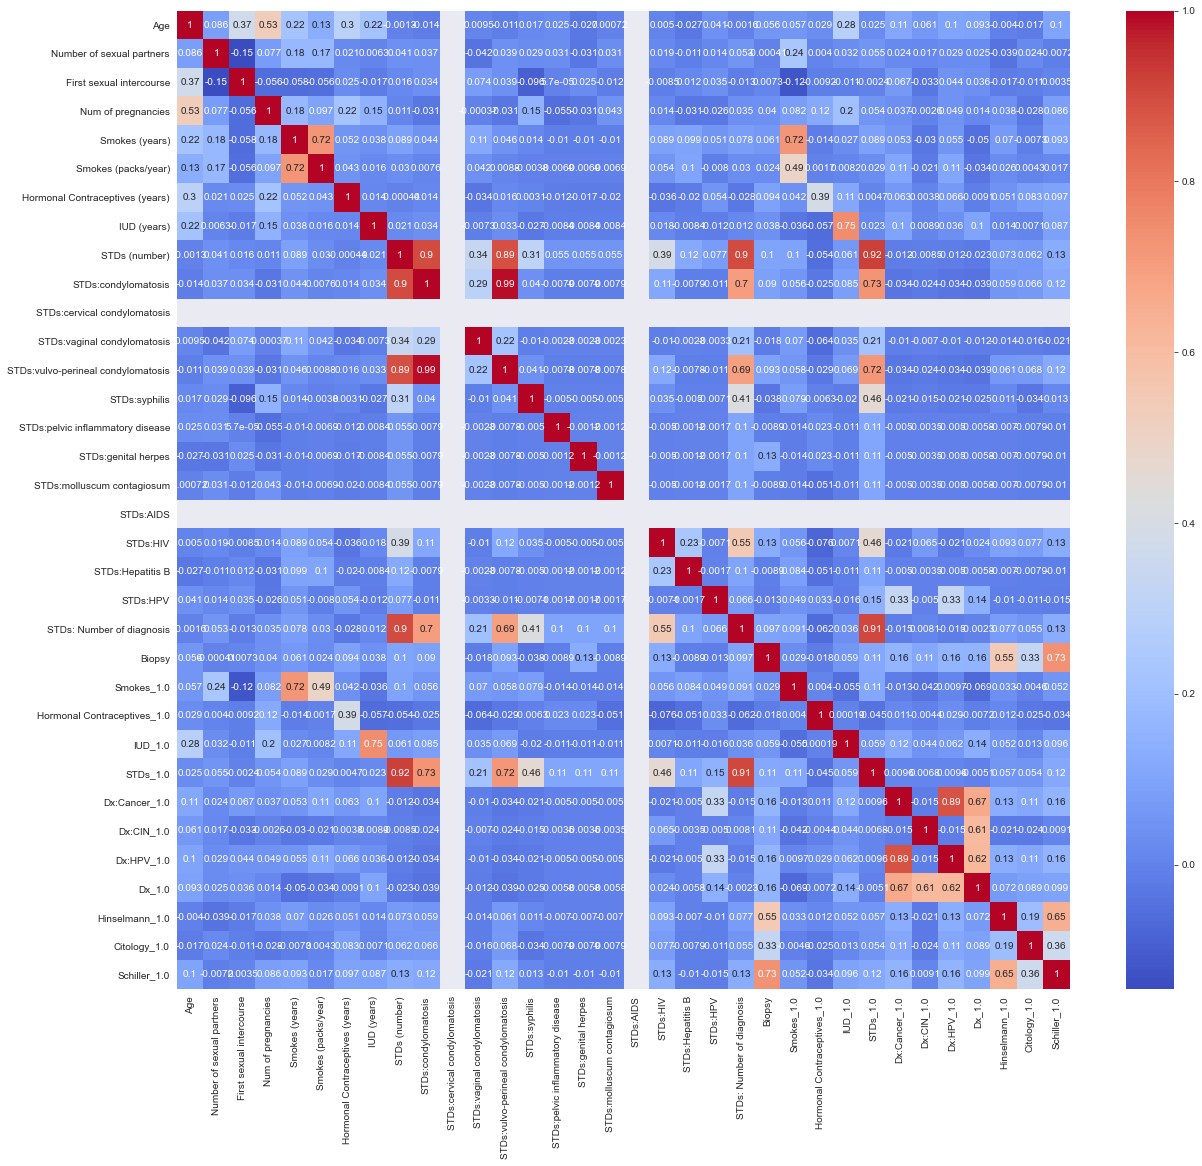

In [13]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [14]:
df.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1, inplace=True)

## Modelling

### Split data into train and test

In [15]:
X = df.drop('Biopsy',axis=1)
y = df['Biopsy']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree
#### Build and train model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
pred = dtc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

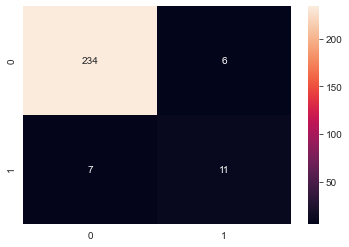

In [23]:
# 234 TN, 6 FP, 7 FN, 11 TP
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [24]:
# Overall: 95% Accuracy, precision, recall, f1
# For positive biopsies: precision is 61%, recall 60%, f1 63% (not good)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       240
         1.0       0.65      0.61      0.63        18

    accuracy                           0.95       258
   macro avg       0.81      0.79      0.80       258
weighted avg       0.95      0.95      0.95       258



### Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
pred = rfc.predict(X_test)

<AxesSubplot:>

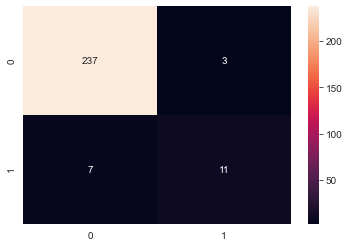

In [29]:
# 235 TN, 7 FP, 7 FN, 9 FP
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [30]:
# Overall: 96% accuracy, precision, recall, f1 score
# for positive biopsies 79% precision, 61% recall, 69% f1 score (a little better)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       240
         1.0       0.79      0.61      0.69        18

    accuracy                           0.96       258
   macro avg       0.88      0.80      0.83       258
weighted avg       0.96      0.96      0.96       258



### Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lrc = LogisticRegression()

In [33]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [34]:
pred = lrc.predict(X_test)

<AxesSubplot:>

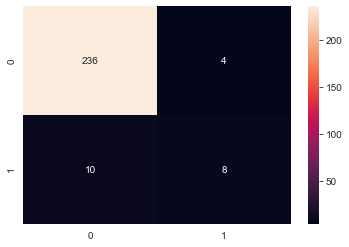

In [35]:
# 236 TN, 4 FP, 10 FN, 8 TP
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [36]:
# Overall: 95% accuracy, 94% precision, 95% recall, 94% f1
# for positive biopsies 67% precision, 44% recall, 53% f1 score (not good)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       240
         1.0       0.67      0.44      0.53        18

    accuracy                           0.95       258
   macro avg       0.81      0.71      0.75       258
weighted avg       0.94      0.95      0.94       258



### Neural Network

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [39]:
scaled = sc.transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.3)

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlpc = MLPClassifier()

In [43]:
mlpc.fit(X_train,y_train)

MLPClassifier()

In [44]:
pred = mlpc.predict(X_test)

<AxesSubplot:>

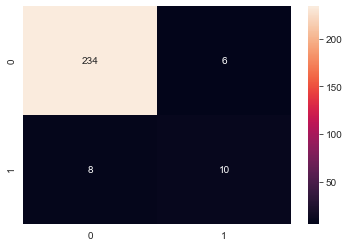

In [45]:
# 234 TN, 6 FP, 8 FN, 10 TP
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [46]:
# Overall: 95% accuracy, 94% precision, 95% recall, 94% f1
# For positive biopsies precision is 62%, recall 56%, f1 59%
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       240
         1.0       0.62      0.56      0.59        18

    accuracy                           0.95       258
   macro avg       0.80      0.77      0.78       258
weighted avg       0.94      0.95      0.94       258



### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knnc = KNeighborsClassifier()

In [62]:
knnc.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
pred = knnc.predict(X_test)

<AxesSubplot:>

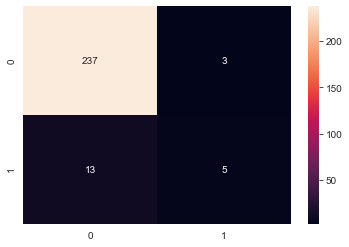

In [64]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [65]:
# Overall: 94% accuracy, 93% precision, 94% recall, 93% f1
# For positive biopsies: 62% precision, 28% recall, 38% f1 (terrible)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       240
         1.0       0.62      0.28      0.38        18

    accuracy                           0.94       258
   macro avg       0.79      0.63      0.68       258
weighted avg       0.93      0.94      0.93       258



#### Find better K with elbow method

In [57]:
error_rate = []
for k in range(1,100):
    knnc = KNeighborsClassifier(n_neighbors=k)
    knnc.fit(X_train,y_train)
    pred = knnc.predict(X_test)
    err = np.mean(y_test != pred)
    error_rate.append(err)

In [58]:
# plot shows that KNN is not great for this problem 
import plotly.express as px 
px.line(df, x=range(1,100), y=error_rate, title='Error Rate vs. K value', labels={'x':'K','y':'Error Rate'})

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       240
         1.0       0.80      0.22      0.35        18

    accuracy                           0.94       258
   macro avg       0.87      0.61      0.66       258
weighted avg       0.93      0.94      0.93       258



<AxesSubplot:>

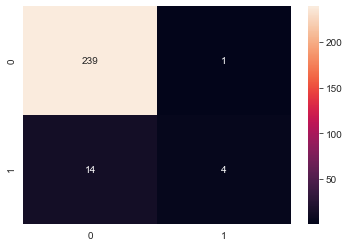

In [59]:
knnc = KNeighborsClassifier(n_neighbors=23)
knnc.fit(X_train,y_train)
pred = knnc.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g') # still terrible

## Winner: Random Forests. 

Note, try to do some feature engineering to improve the results. I haven't learned that yet. 